# Bike Sharing Assignment

### Understanding the data

In [76]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# importing the libraries needed to perform train-test split

import sklearn
from sklearn.model_selection import train_test_split

# import library for scaling 
from sklearn.preprocessing import MinMaxScaler 

# importing the statsmodel 
import statsmodels.api as sm

# importing variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Creating a dataframe from the csv file 
bike_sharing_1 = pd.read_csv("day.csv")

In [5]:
bike_sharing_1.shape

(730, 16)

In [6]:
bike_sharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_sharing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [26]:
# Filtering the columns with int64 datatype
bike_sharing_1.select_dtypes(include=[np.int64]).columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
# Filtering the columns with object data type 
bike_sharing_1.select_dtypes(include=['object']).columns

Index(['dteday'], dtype='object')

In [16]:
# Filtering the columns with float64 datatype
bike_sharing_1.select_dtypes(include=[np.float64]).columns

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [11]:
bike_sharing_1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualizing the variables

In [19]:
bike_sharing_1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
bs1_vv = bike_sharing_1[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 
                        'atemp', 'hum', 'windspeed', 'cnt']]

In [22]:
bs1_vv.shape

(730, 12)

In [24]:
# creating a dataframe with only the numeric(float64) variables & cnt for visualization
bs1_vv1 = bike_sharing_1[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

C:\Users\sprad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


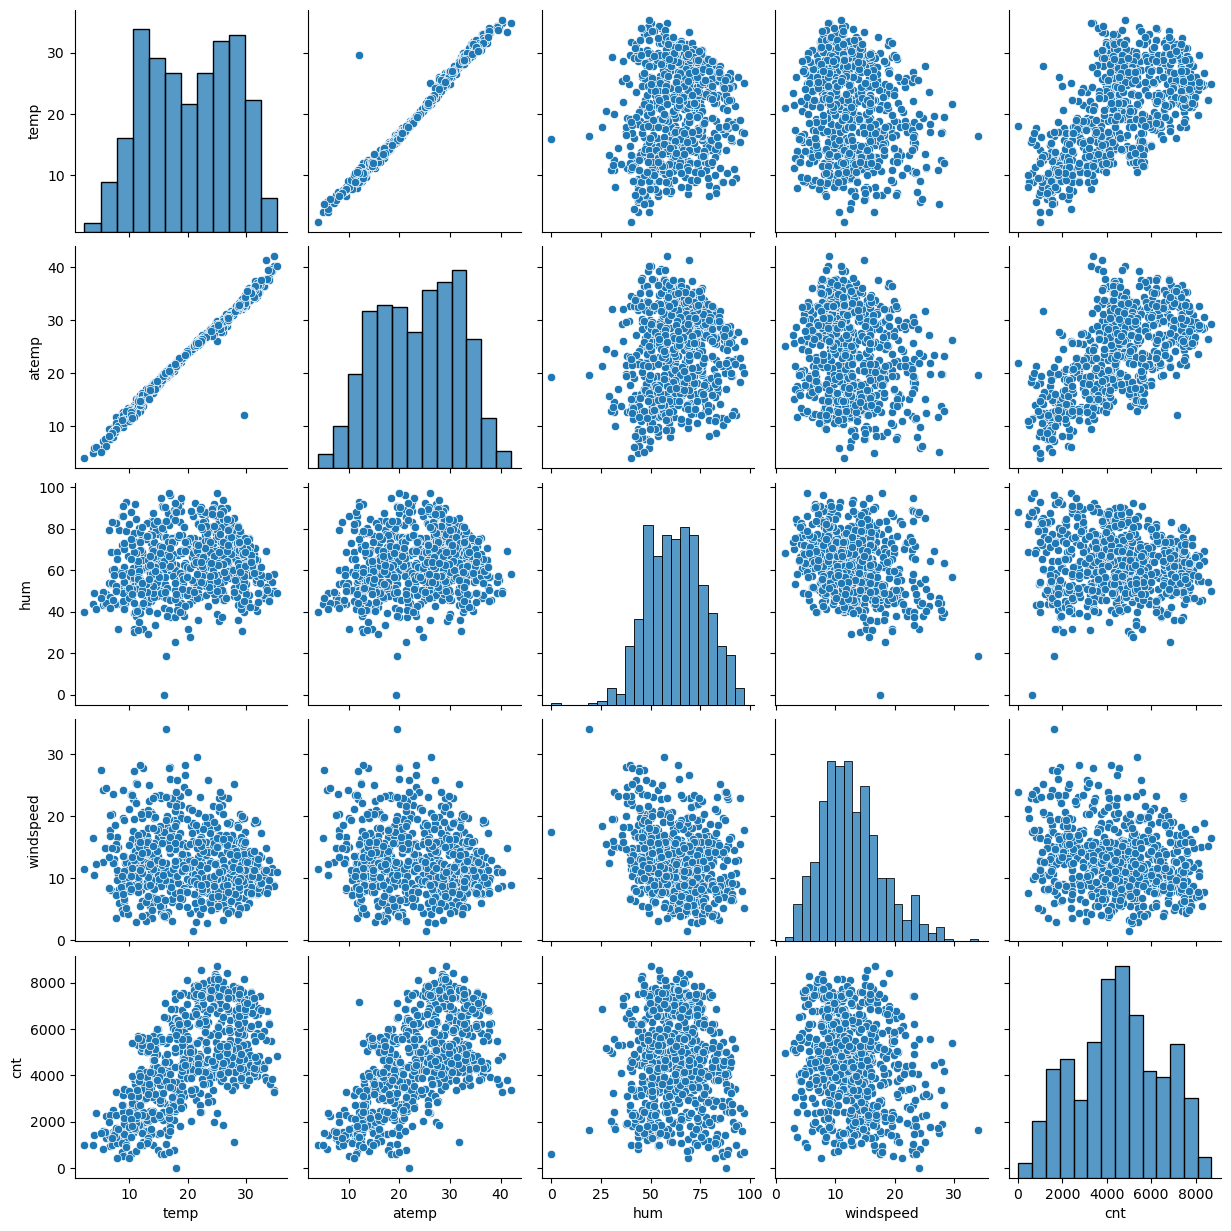

In [25]:
sns.pairplot(bs1_vv1)
plt.show()

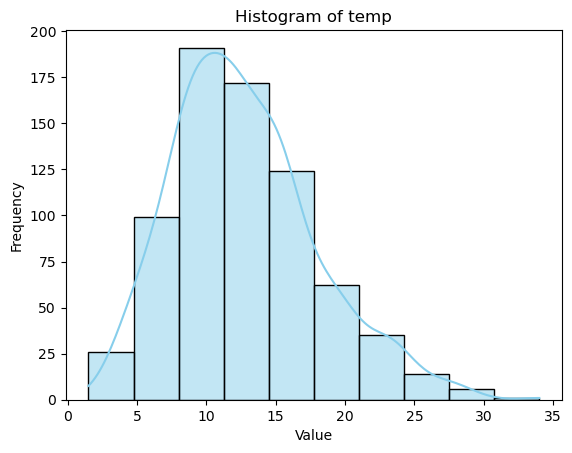

In [75]:
sns.histplot(bike_sharing_1['windspeed'], bins=10, color='skyblue', kde=True)  # Adjust parameters as needed

# Display the plot
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of temp")
plt.show()

In [27]:
bike_sharing_1.select_dtypes(include=[np.int64]).columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object')

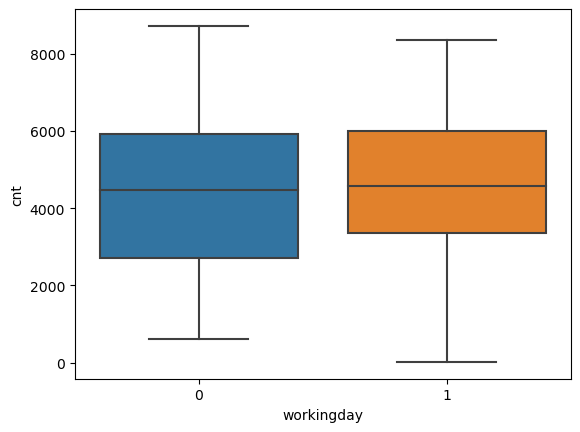

In [31]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_1)
plt.show()

In [29]:
bike_sharing_1.select_dtypes(include=[np.int64]).columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object')

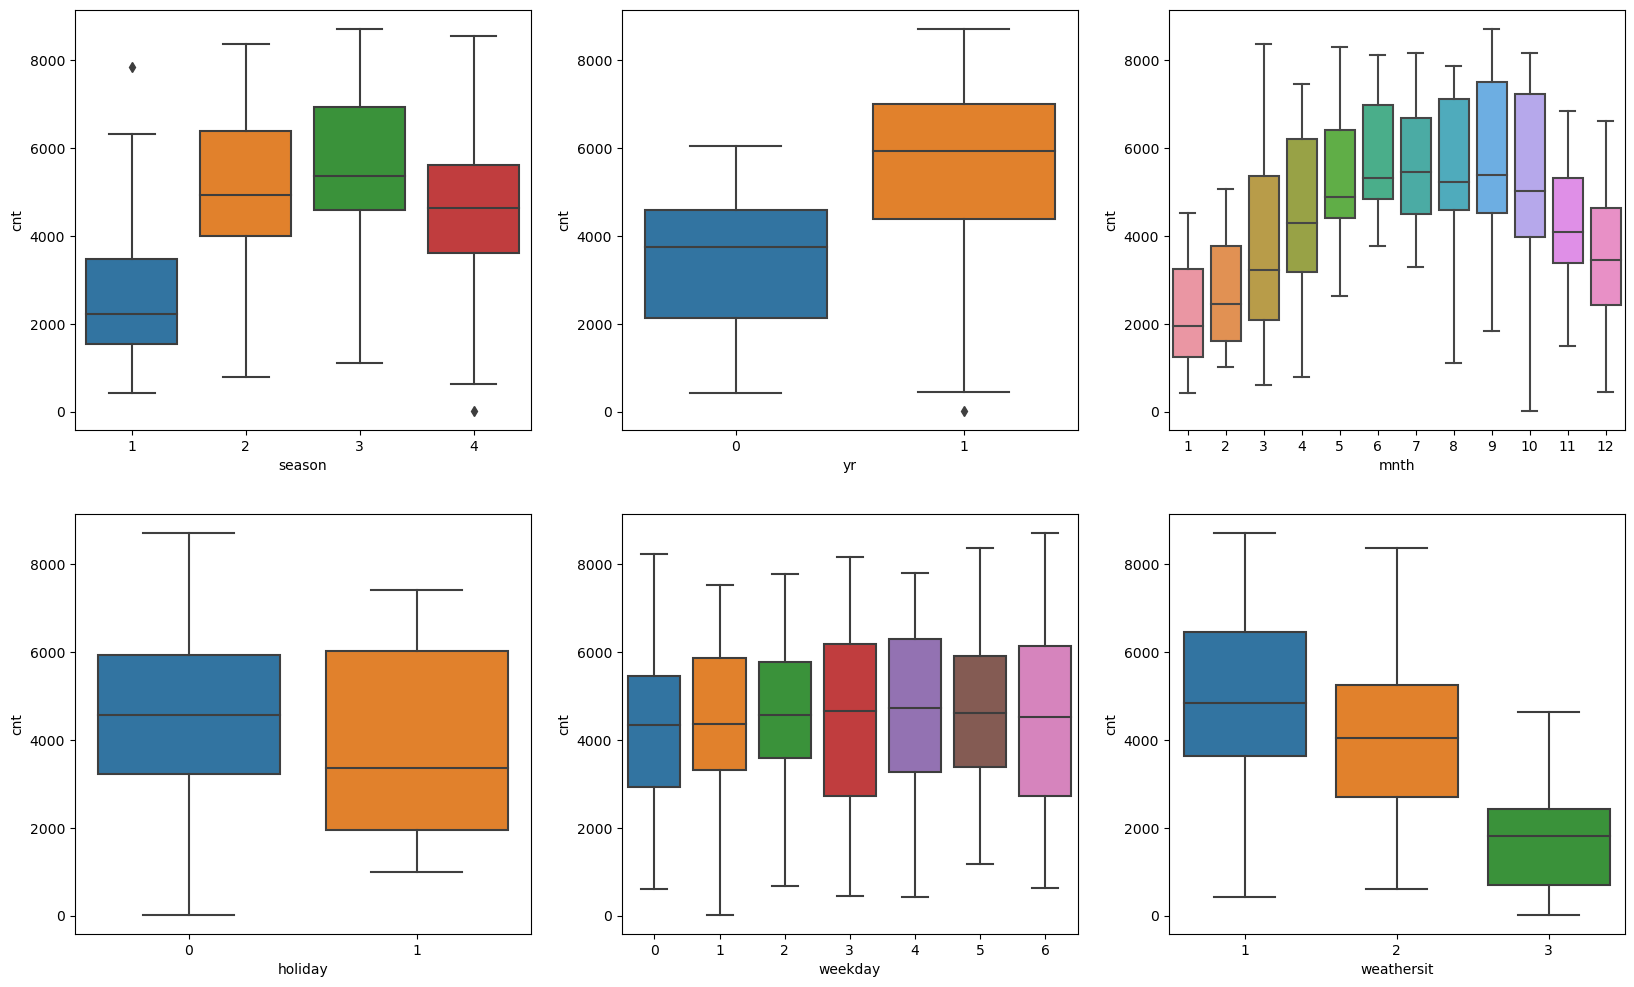

In [30]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_1)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_1)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_1)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_1)

plt.show()

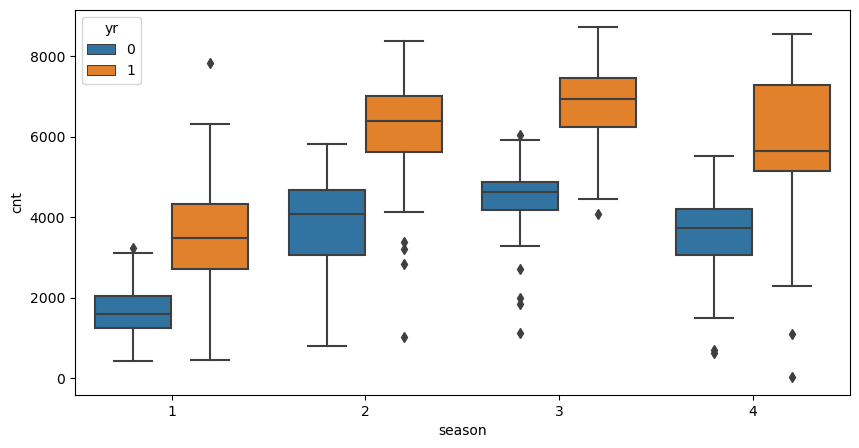

In [32]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike_sharing_1)
plt.show()

### Assigning the right values to the following variables - "season" and "weathersit"

In [36]:
bike_sharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
bike_sharing_1.shape

(730, 16)

In [39]:
bike_sharing_1['season'] = bike_sharing_1['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [40]:
bike_sharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [41]:
bike_sharing_1.shape

(730, 16)

In [42]:
bike_sharing_1['weathersit'] = bike_sharing_1['weathersit'].replace({1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'})

In [43]:
bike_sharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
bike_sharing_1['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [45]:
bike_sharing_1['weathersit'].value_counts()

weathersit
clear         463
mist          246
light snow     21
Name: count, dtype: int64

### Creating dummy columns for the following variables - "season" and "weathersit"

In [48]:
status_season = pd.get_dummies(bike_sharing_1['season'], dtype=int)

In [49]:
status_season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [50]:
status_season_dropfirst = pd.get_dummies(bike_sharing_1['season'], dtype=int, drop_first = True)

In [51]:
status_season_dropfirst

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [52]:
bike_sharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
status_weathersit = pd.get_dummies(bike_sharing_1['weathersit'], dtype=int)

In [55]:
status_weathersit.head()

,clear,light snow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [56]:
status_weathersit_dropfirst = pd.get_dummies(bike_sharing_1['weathersit'], dtype=int, drop_first = True)

In [57]:
status_weathersit_dropfirst.head()

,light snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### Concatanating dummy columns with the dataframe and removing the columns "season" and "weathersit" 

In [58]:
bike_sharing_1_dc = bike_sharing_1

In [59]:
bike_sharing_1_dc.shape

(730, 16)

In [60]:
bike_sharing_1_dc = pd.concat([bike_sharing_1_dc, status_season_dropfirst], axis = 1)

In [61]:
bike_sharing_1_dc.shape

(730, 19)

In [62]:
bike_sharing_1_dc = pd.concat([bike_sharing_1_dc, status_weathersit_dropfirst], axis = 1)

In [63]:
bike_sharing_1_dc.shape

(730, 21)

In [65]:
bike_sharing_1_dc.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,spring,summer,winter,light snow,mist
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,...,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,...,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,...,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,...,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,...,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [66]:
bike_sharing_1_dc.drop(['season'], axis = 1, inplace = True)

In [67]:
bike_sharing_1_dc.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light snow,mist
0,1,01-01-2018,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [68]:
bike_sharing_1_dc.drop(['weathersit'], axis = 1, inplace = True)

In [69]:
bike_sharing_1_dc.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light snow,mist
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [70]:
bike_sharing_1_dc.shape

(730, 19)

In [79]:
bike_sharing_1_dc.drop(['dteday'], axis = 1, inplace = True)
bike_sharing_1_dc.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


### Dropping the columns "casual" and "registered"

In [85]:
bike_sharing_1_dc.drop(['casual'], axis = 1, inplace = True)
bike_sharing_1_dc.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,654,985,1,0,0,0,1
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,670,801,1,0,0,0,1
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,1,0,0,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1454,1562,1,0,0,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1518,1600,1,0,0,0,0


In [86]:
bike_sharing_1_dc.drop(['registered'], axis = 1, inplace = True)`
bike_sharing_1_dc.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [92]:
bike_sharing_1_dc.drop(['instant'], axis = 1, inplace = True)
bike_sharing_1_dc.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [93]:
bike_sharing_1_dc.shape

(730, 15)

In [100]:
bike_sharing_1_dc.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Performing the train-test split

In [77]:
# importing the libraries needed to perform train-test split

import sklearn
from sklearn.model_selection import train_test_split

In [94]:
bike_sharing_1_dc.shape

(730, 15)

In [95]:
df_bike_sharing_train, df_bike_sharing_test = train_test_split(bike_sharing_1_dc, train_size = 0.7, random_state = 100)
print(df_bike_sharing_train.shape)
print(df_bike_sharing_test.shape)

(510, 15)
(220, 15)


In [97]:
df_bike_sharing_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,1
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,1
111,0,4,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,1


In [99]:
df_bike_sharing_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.541176,0.025490,2.990196,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,3.465416,0.157763,2.017093,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Perform scaling using Min-Max

In [101]:
# import library for scaling 
from sklearn.preprocessing import MinMaxScaler 

In [102]:
df_bike_sharing_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,1
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,1
111,0,4,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,1


In [103]:
df_bike_sharing_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'light snow',
       'mist'],
      dtype='object')

In [104]:
# Instantiate an object 
scaler = MinMaxScaler()

# create a list of only variables you want to scale 
bs_vars_toscale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_bike_sharing_train[bs_vars_toscale] = scaler.fit_transform(df_bike_sharing_train[bs_vars_toscale])
df_bike_sharing_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


In [105]:
df_bike_sharing_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.541176,0.025490,2.990196,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,3.465416,0.157763,2.017093,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Understand the correlation

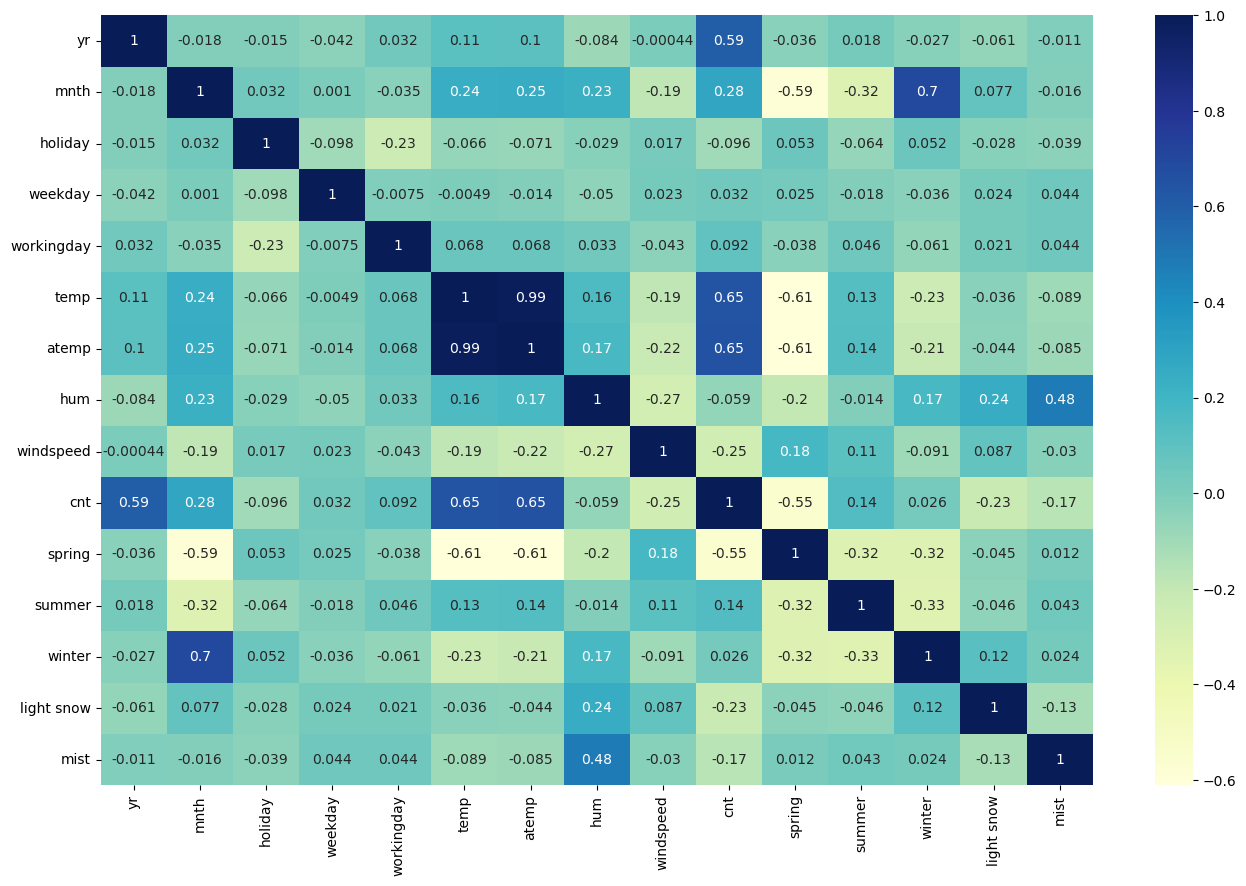

In [106]:
# Let's check the correlation coefficients to see which variables are highly correlated 

plt.figure(figsize = (16, 10))
sns.heatmap(df_bike_sharing_train.corr(), annot = True, cmap="YlGnBu")

plt.show()

### Building the model - I - Using all the variables

In [107]:
df_bike_sharing_train.shape

(510, 15)

In [108]:
df_bike_sharing_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


In [109]:
y_train_bs = df_bike_sharing_train.pop('cnt')
X_train_bs = df_bike_sharing_train

In [111]:
print(y_train_bs.shape)
print(X_train_bs.shape)

(510,)
(510, 14)


In [112]:
# importing the statsmodel 
import statsmodels.api as sm

In [113]:
X_train_bs.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [114]:
y_train_bs.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [115]:
# add a constant
X_train_bs_sm = sm.add_constant(X_train_bs)



In [116]:
X_train_bs_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
576,1.0,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1.0,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1.0,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,1.0,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [117]:
# create first model 
lr = sm.OLS(y_train_bs, X_train_bs_sm)

# fit 
lr_model = lr.fit()

# params 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          3.01e-182
Time:                        16:59:29   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2386      0.039      6.047      0.000       0.161       0.316
yr             0.2322      0.008     27.702      0.000       0.216       0.249
mnth           0.0014      0.002      0.578      0.563      -0.003       0.006
holiday       -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday        0.0081      0.002      3.878      0.000       0.004       0.012
workingday     0.0187      0.009      2.059      0.040       0.001       0.037
temp           0.4329      0.139      3.118      0.002       0.160       0.706
atemp          0.0628      0.142      0.443      0.658      -0.216       0.342
hum           -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed     -0.1783      0.027     -6.597      0.000      -0.231      -0.125
spring        -0.0695      0.023     -3.013      0.003      -0.115      -0.024
summer         0.0473      0.016      3.027      0.003       0.017       0.078
winter         0.0835      0.019      4.472      0.000       0.047       0.120
light snow    -0.2463      0.027     -9.024      0.000      -0.300      -0.193
mist          -0.0566      0.011     -5.203      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF 

In [118]:
# importing variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
# type(vif)

vif['Features'] = X_train_bs_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_bs_sm.values, i) for i in range(X_train_bs_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.99
6,temp,57.99
7,atemp,53.56
10,spring,5.78
2,mnth,3.89
12,winter,3.83
11,summer,2.68
8,hum,1.90
14,mist,1.58
13,light snow,1.26


### Building the model - II : All the variables (minus) "atemp"
##### "atemp" has both high p-value and high VIF

In [121]:
X_train_bs.shape

(510, 14)

In [122]:
X_train_bs.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [123]:
X_train_bs_model2 =  X_train_bs.drop('atemp', axis=1)
X_train_bs_model2.shape

(510, 13)

In [125]:
# Create model 2 after 'atemp' is dropped
X_train_bs_model2_sm = sm.add_constant(X_train_bs_model2)
X_train_bs_model2_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,winter,light snow,mist
576,1.0,1,7,0,2,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,3,0,6,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,1.0,1,12,0,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,4,0,6,0,0.395666,0.504508,0.188475,0,1,0,0,1
111,1.0,0,4,0,5,1,0.345824,0.751824,0.380981,0,1,0,0,1


In [127]:
# create second model 
lr = sm.OLS(y_train_bs, X_train_bs_model2_sm)

# fit 
lr_model = lr.fit()

# params 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          2.35e-183
Time:                        17:39:07   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2384      0.039      6.048      0.000       0.161       0.316
yr             0.2321      0.008     27.721      0.000       0.216       0.249
mnth           0.0014      0.002      0.581      0.561      -0.003       0.006
holiday       -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday        0.0080      0.002      3.864      0.000       0.004       0.012
workingday     0.0187      0.009      2.058      0.040       0.001       0.037
temp           0.4925      0.034     14.427      0.000       0.425       0.560
hum           -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed     -0.1807      0.027     -6.817      0.000      -0.233      -0.129
spring        -0.0684      0.023     -2.985      0.003      -0.113      -0.023
summer         0.0485      0.015      3.152      0.002       0.018       0.079
winter         0.0848      0.018      4.614      0.000       0.049       0.121
light snow    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
mist          -0.0567      0.011     -5.218      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif = pd.DataFrame()
# type(vif)

vif['Features'] = X_train_bs_model2_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_bs_model2_sm.values, i) for i in range(X_train_bs_model2_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.98
9,spring,5.72
2,mnth,3.89
11,winter,3.72
6,temp,3.51
10,summer,2.61
7,hum,1.90
13,mist,1.58
12,light snow,1.25
8,windspeed,1.20


### Building the model - III : All the variables (minus) "atemp" (minus) "mnth"

In [129]:
X_train_bs_model2.shape

(510, 13)

In [130]:
X_train_bs_model3 =  X_train_bs_model2.drop('mnth', axis=1)
X_train_bs_model3.shape

(510, 12)

In [131]:
# Create model 3 after 'mnth' is dropped
X_train_bs_model3_sm = sm.add_constant(X_train_bs_model3)
X_train_bs_model3_sm.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,winter,light snow,mist
576,1.0,1,0,2,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,6,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,1.0,1,0,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,6,0,0.395666,0.504508,0.188475,0,1,0,0,1
111,1.0,0,0,5,1,0.345824,0.751824,0.380981,0,1,0,0,1


In [132]:
# create third model 
lr = sm.OLS(y_train_bs, X_train_bs_model3_sm)

# fit 
lr_model = lr.fit()

# params 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          1.89e-184
Time:                        17:50:03   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.037      6.741      0.000       0.175       0.319
yr             0.2319      0.008     27.737      0.000       0.216       0.248
holiday       -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday        0.0081      0.002      3.906      0.000       0.004       0.012
workingday     0.0186      0.009      2.048      0.041       0.001       0.036
temp           0.4933      0.034     14.475      0.000       0.426       0.560
hum           -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed     -0.1803      0.026     -6.810      0.000      -0.232      -0.128
spring        -0.0744      0.020     -3.645      0.000      -0.115      -0.034
summer         0.0444      0.014      3.245      0.001       0.018       0.071
winter         0.0892      0.017      5.319      0.000       0.056       0.122
light snow    -0.2479      0.027     -9.132      0.000      -0.301      -0.195
mist          -0.0570      0.011     -5.261      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
vif = pd.DataFrame()
# type(vif)

vif['Features'] = X_train_bs_model3_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_bs_model3_sm.values, i) for i in range(X_train_bs_model3_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.47
8,spring,4.55
5,temp,3.50
10,winter,3.10
9,summer,2.07
6,hum,1.88
12,mist,1.57
11,light snow,1.25
7,windspeed,1.20
2,holiday,1.08


### Prediction using the model 3

In [135]:
X_train_bs.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [136]:
X_train_bs_model3_sm.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,winter,light snow,mist
576,1.0,1,0,2,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,6,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,1.0,1,0,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,6,0,0.395666,0.504508,0.188475,0,1,0,0,1
111,1.0,0,0,5,1,0.345824,0.751824,0.380981,0,1,0,0,1


In [137]:
y_train_bs_pred = lr_model.predict(X_train_bs_model3_sm)
y_train_bs_pred.head()

576    0.777076
426    0.487822
728    0.343363
482    0.612670
111    0.300974
dtype: float64

C:\Users\sprad\AppData\Local\Temp\ipykernel_29792\1542570051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

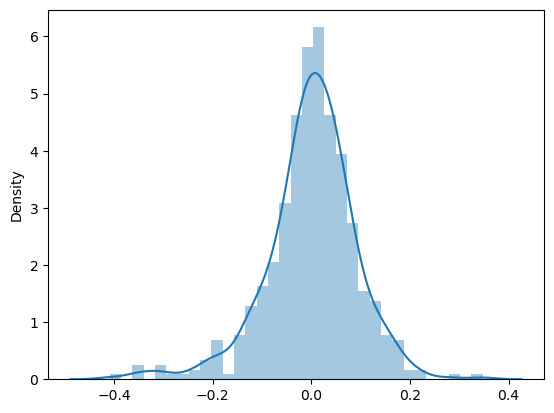

In [138]:
res = y_train_bs - y_train_bs_pred
sns.distplot(res)

In [140]:
# Calculating the r2_score
from sklearn.metrics import r2_score
# r2_score(y_test = y_train_bs , y_pred = y_train_bs_pred)
r2_score(y_true = y_train_bs , y_pred = y_train_bs_pred)

0.8331492771013295

### Predictions and Evaluations on the test set

In [141]:
df_bike_sharing_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0


In [142]:
df_bike_sharing_test.shape

(220, 15)

In [143]:
# Scaling certain variables in the test data set. This is inline with what was done to the train dataset
bs_vars_toscale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# We transform certain variables of the test data
df_bike_sharing_test[bs_vars_toscale] = scaler.transform(df_bike_sharing_test[bs_vars_toscale])
df_bike_sharing_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [144]:
df_bike_sharing_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,6.490909,0.036364,3.013636,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,3.422316,0.187620,1.985057,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
y_test_bs = df_bike_sharing_test.pop('cnt')
X_test_bs = df_bike_sharing_test

In [146]:
df_bike_sharing_test.shape

(220, 14)

In [147]:
y_test_bs.shape

(220,)

In [148]:
X_test_bs.shape

(220, 14)

In [149]:
df_bike_sharing_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [150]:
X_test_bs.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [151]:
y_test_bs.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [152]:
X_test_bs_sm = sm.add_constant(X_test_bs)

In [154]:
X_test_bs_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
184,1.0,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [155]:
X_test_bs_sm = X_test_bs_sm.drop(['mnth', 'atemp'], axis=1)

In [156]:
X_test_bs_sm.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,winter,light snow,mist
184,1.0,0,1,1,0,0.831783,0.657364,0.084219,0,0,0,0,1
535,1.0,1,0,3,1,0.901354,0.610133,0.153728,0,1,0,0,0
299,1.0,0,0,4,1,0.511964,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0,3,1,0.881625,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,4,1,0.817246,0.314298,0.537414,0,1,0,0,0


In [157]:
X_test_bs_sm.shape

(220, 13)

In [158]:
y_test_bs_pred = lr_model.predict(X_test_bs_sm)
y_test_bs_pred.head()

184    0.446978
535    0.906561
299    0.417315
221    0.608616
152    0.609063
dtype: float64

C:\Users\sprad\AppData\Local\Temp\ipykernel_29792\2347060407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res_test)


<Axes: ylabel='Density'>

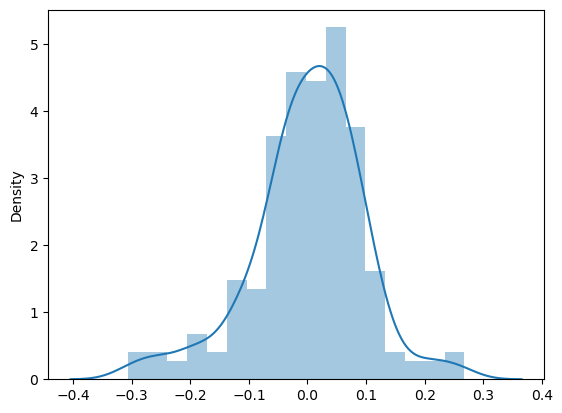

In [159]:
res_test = y_test_bs - y_test_bs_pred
sns.distplot(res_test)

In [160]:
# Calculating the r2_score
from sklearn.metrics import r2_score
r2_score(y_true = y_test_bs , y_pred = y_test_bs_pred)

0.8096391848904637